In [7]:
import torch 
import torch.nn as nn
import torch.optim as optim 
import torchvision.datasets as dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor

In [4]:
  train_ds=dataset.MNIST(
        root="data",
        train=True,
        download=True,
        transform=ToTensor()


    )


100%|██████████| 9912422/9912422 [00:02<00:00, 3824939.12it/s]


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw



100%|██████████| 28881/28881 [00:00<00:00, 512058.77it/s]


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw



100%|██████████| 1648877/1648877 [00:01<00:00, 1325735.99it/s]


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw



In [5]:
  test_ds=dataset.MNIST(
        root="data",
        train=False,
        download=True,
        transform=ToTensor()


    )


In [6]:
print(train_ds.data.shape)
print(test_ds.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [8]:
Batch_size=32
train_dl=DataLoader(dataset=train_ds, batch_size=Batch_size , shuffle=True)
test_dl=DataLoader(dataset=test_ds, batch_size=Batch_size , shuffle=True)

In [9]:
img, label =next(iter(train_dl))
print(img.shape)
print(label)


torch.Size([32, 1, 28, 28])
tensor([7, 2, 8, 0, 2, 8, 7, 1, 3, 5, 4, 7, 9, 1, 3, 9, 8, 9, 7, 5, 6, 5, 8, 4,
        2, 9, 9, 1, 3, 5, 9, 8])


In [15]:
img[0,0].shape

torch.Size([28, 28])

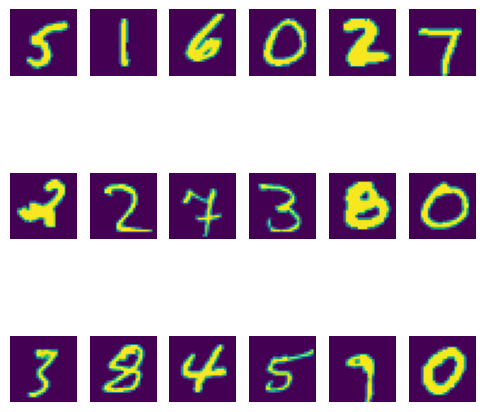

In [16]:
image ,target = next(iter(train_dl))
plt.figure(figsize=(6,6))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.imshow(image[i,0])
    plt.axis('off')
plt.show()

# Model

In [31]:
class SimpleNN (nn.Module):
    def __init__(self,num_features, num_classes):
        super(SimpleNN,self).__init__()
        self.fc1=nn.Linear(in_features=num_features, out_features=100 )
        self.fc2=nn.Linear(in_features=100, out_features=num_classes)
    def forward(self,x):
        out=self.fc1(x)
        out=f.relu(out)
        out=self.fc2(out)
        return out




In [32]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [33]:
model=SimpleNN(28*28, 10).to(device)
model

SimpleNN(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

# Optimizer

In [34]:
optimizer= optim.Adam(model.parameters(), lr=0.01)

# Loss function 

In [35]:
criterion = nn.CrossEntropyLoss() 

In [37]:
epochs=20 

for i in range(epochs): 
    sumloss=0
    for idx, (image,label) in enumerate(train_dl): 
        image=image.to(device)
        label=label.to(device)
        image=image.reshape(image.shape[0],-1)
        optimizer.zero_grad()
        score=model(image)
        loss=criterion(score ,label)
        sumloss+=loss
        loss.backward()
        optimizer.step()
    print(f'loss in epoch {i+1} is equal to {sumloss}')



loss in epoch 1 is equal to 180.1622314453125
loss in epoch 2 is equal to 176.63916015625
loss in epoch 3 is equal to 180.22906494140625
loss in epoch 4 is equal to 164.32139587402344
loss in epoch 5 is equal to 178.6990203857422
loss in epoch 6 is equal to 163.7190399169922
loss in epoch 7 is equal to 167.07955932617188
loss in epoch 8 is equal to 162.30740356445312
loss in epoch 9 is equal to 168.6746368408203
loss in epoch 10 is equal to 151.08163452148438
loss in epoch 11 is equal to 152.34539794921875
loss in epoch 12 is equal to 155.13800048828125
loss in epoch 13 is equal to 138.65692138671875
loss in epoch 14 is equal to 154.53787231445312
loss in epoch 15 is equal to 144.4160614013672
loss in epoch 16 is equal to 161.58799743652344
loss in epoch 17 is equal to 142.01495361328125
loss in epoch 18 is equal to 150.03240966796875
loss in epoch 19 is equal to 140.5784454345703
loss in epoch 20 is equal to 142.5614013671875


In [39]:
def checkaccuracy (dataloader, model): 
    if dataloader.dataset.train : 
        print('Accuracy on train data')
    else:
        print('Accuracy on test data')
    
    num_correct=0
    num_samples=0

    model.eval()

    with torch.no_grad():
        for x,y in dataloader:
            x=x.to(device)
            y=y.to(device)

            x=x.reshape(x.shape[0],-1)
            score=model(x)

            _,pred=score.max(1)
            num_correct+=(pred==y).sum()
            num_samples+=len(y)

        print(f'accuracy is equal to {num_correct/num_samples} ')
    model.train()

In [40]:
checkaccuracy(train_dl, model)

Accuracy on train data
accuracy is equal to 0.9861500263214111 


In [41]:
checkaccuracy(test_dl, model)

Accuracy on test data
accuracy is equal to 0.9619999527931213 
